In [ ]:
# rdd # 스파크의 가장 기본적인 데이터 구조(셋) , 탄력적이면서 병렬 분산된  저수준의 데이터 셋 
# dataframe  # 상대적인 고수준의 데이터 셋

In [ ]:
myRange = spark.range(1000).toDF("number")
myRange.head()
myRange.head(10)
myRange.tail(10)

In [ ]:
divisBy2 = myRange.where("number % 2 = 0")
divisBy2.head(10)
divisBy2.count()


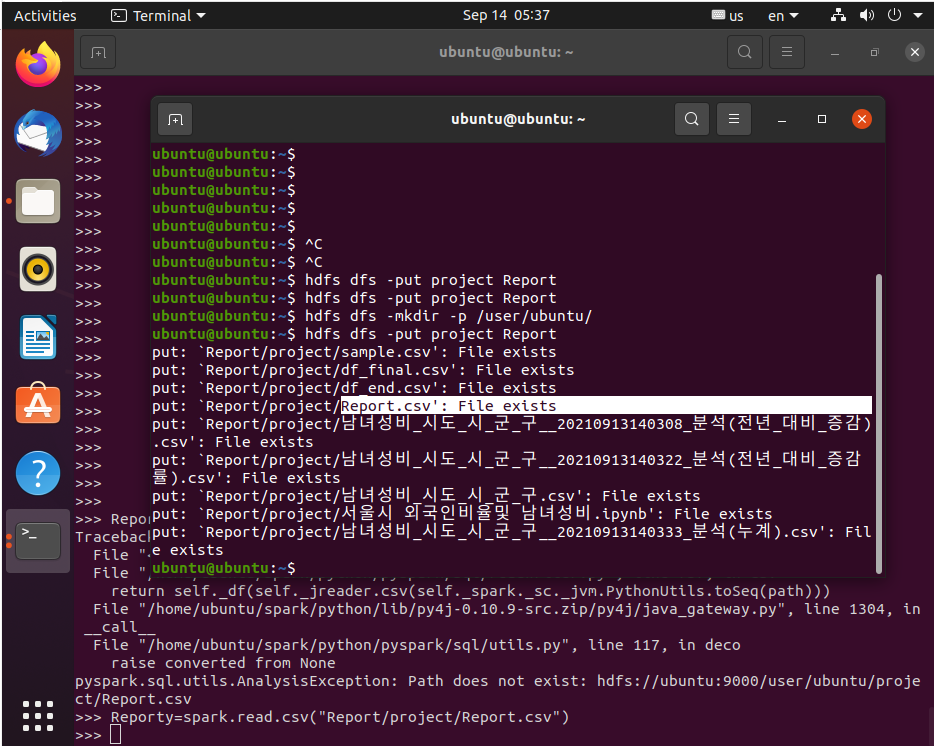

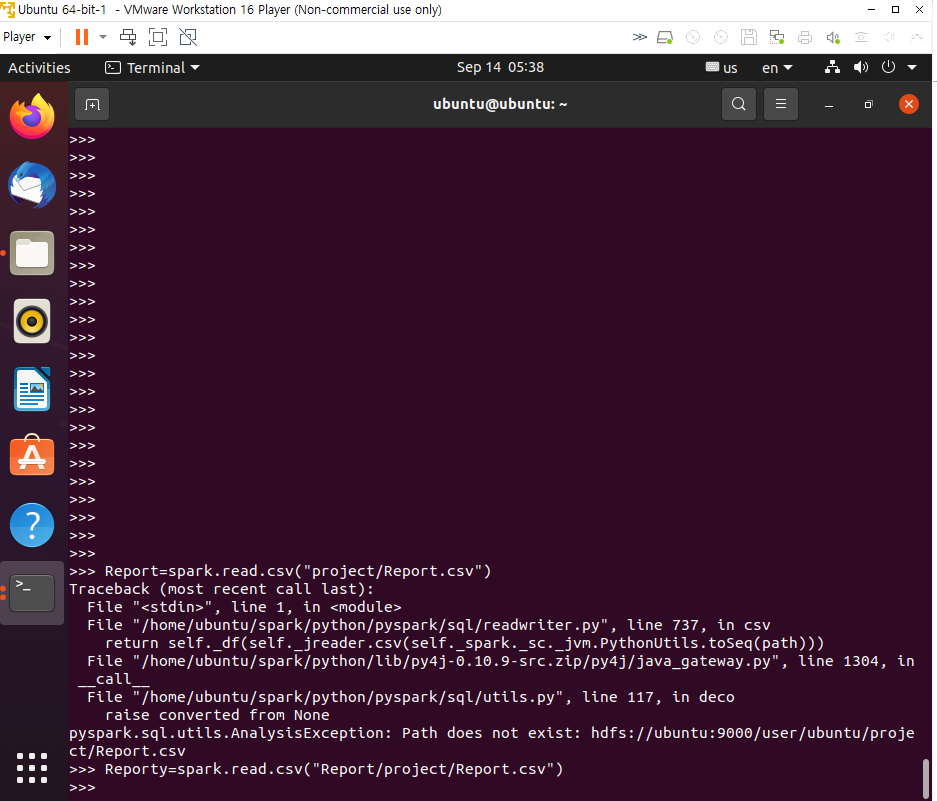


In [ ]:
# hadoop에 올리기
hdfs dfs -put data data #1번 data 저장할 파일(폴더)이름  2번 data 저장할 위치



#여기는 파이스파크가 아니라 프로토콜 화면
# hdfs dfs -mkdir -p /user/ubuntu/    #경로!!
# hdfs dfs -put data data

In [ ]:
flights2010 = spark.read.csv("data/flights/csv/2010-summary.csv")
flights2010.printSchema()
flights2010.take(5)

In [ ]:
flights2010 = spark.read.option("header", "true").csv("data/flights/csv/2010-summary.csv") 
#csv첫줄을 불러오기
#("header", "true") 맨윗줄이 헤더이며 컬림(true)이다.
flights2010.printSchema()
flights2010.take(5)

# 옵션을 줘서 좀더  정리된 형식으로 읽어오자.

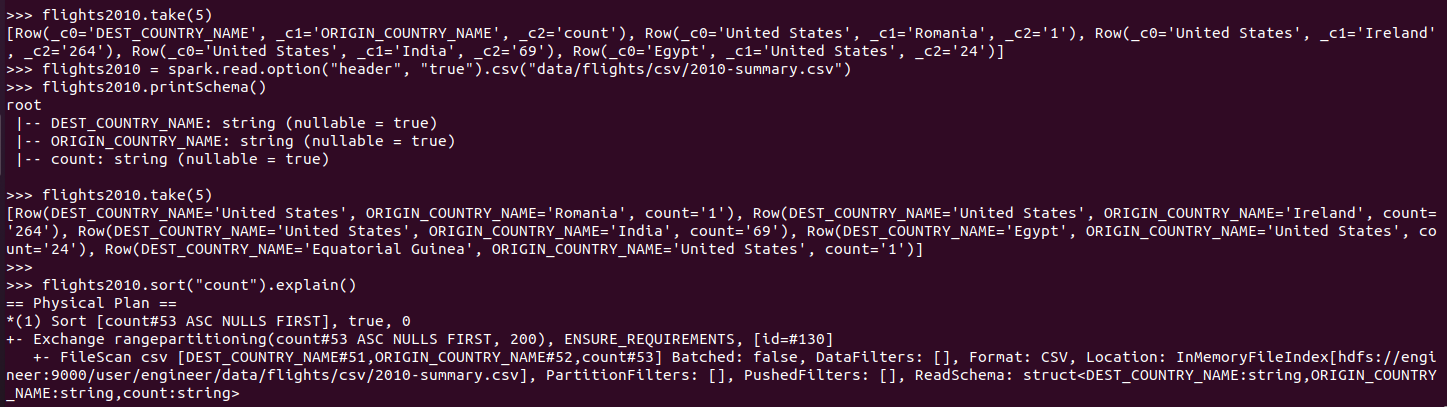


In [ ]:
# 옵션유무시의 차이점 

In [ ]:
# 실행 계획- 꼭 미리 계획하자!!
flights2010.sort("count").explain()

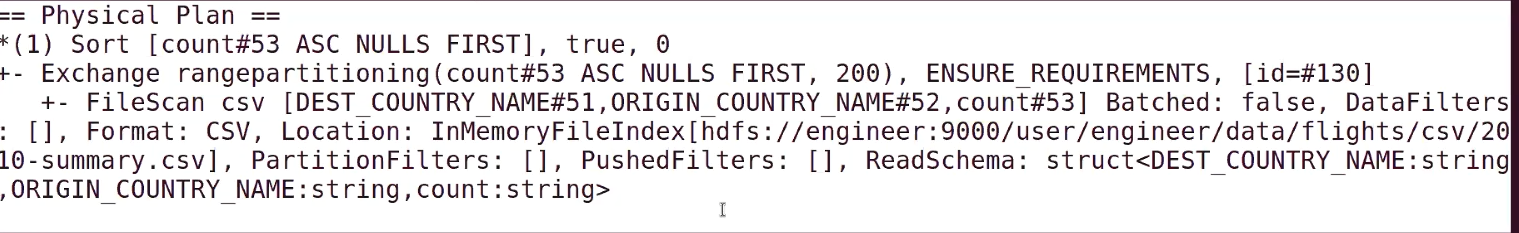

In [ ]:
# shuffle partition 변경
spark.conf.set("spark.sql.shuffle.partitions", "5")
flights2010.sort("count").take(2)
#partition 은 rdd에서의 파티션 분할개념 5개로 쪼갠다는 소리
# map&reduce 에서 나온거 map에서 나온자료를 reduce로 나눠서 보낼때 섞어서 보냄.최대 200까지 가능 

In [ ]:
f2015 = spark.read.format("json").load("data/flights/json/2015-summary.json") #json 형태의 데이터 불러오기 #상대경로
f2015.show()
f2015.show(5)
f2015.show(f2015.count())

In [ ]:

# 스탠드올런은 /home/$ data에서 가저오는거임 

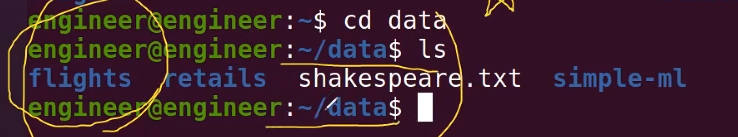

In [ ]:
스탠드 얼론은 절대경로이면 f2015 = spark.read.format("json").load("/home/engineer/data/flights/json/2015-summary.json")

In [ ]:
# 하둡은 hdfs는 하둡위에 있는 파일을 스파크로
하둡은 절대경로이면 f2015 = spark.read.format("json").load("/user/engineer/data/flights/json/2015-summary.json") 라고 생각하면 편함

In [ ]:
# table 만들기
f2015.createOrReplaceTempView("flights2015")

In [ ]:
# dataframe
f2015.groupBy("DEST_COUNTRY_NAME").count().show()

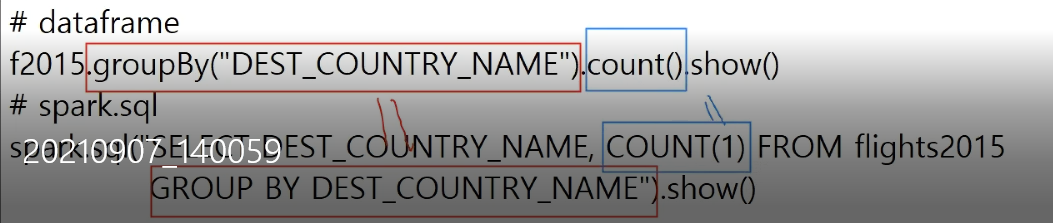

In [ ]:
# spark.sql

In [ ]:
spark.sql("SELECT DEST_COUNTRY_NAME, COUNT(1) FROM flights2015 GROUP BY DEST_COUNTRY_NAME").show()


In [ ]:
# spark.sql은 ansi표준을 따른다.